In [27]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import networkx as nx

In [80]:
df_contracts = pd.read_excel('data/contracts.xlsx', parse_dates=['Date'])


/tmp/ipykernel_47162/26949517.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_contracts = pd.read_excel('data/contracts.xlsx', parse_dates=['Date'])


,Contract ID,Register,Page,Date
49459,015f9650-4cf2-4e09-a71e-fefc7501f6a0,180,f2r,1724-01-02
49460,7a840453-0871-4407-94db-ad02f3162985,180,f2v,1724-01-03
49461,3cdebff4-00d1-4660-ac8a-33b10a5ada14,180,f2v,1724-01-10
49462,5ea3d7df-8684-4039-a4ef-d5e8ed9b5c89,180,f2v,1724-01-10
49463,2e1ea0d4-3074-4a52-a5db-ce1a39616fb5,180,f2v,1724-01-11
...,...,...,...,...
54211,ccda404b-95ff-46fb-b491-177e2a1de4c8,182,f40r,1772-05-09
54212,40f49aa3-bff4-4221-a22a-801df6f7c899,182,f40r,1772-05-13
54213,da38eb53-b74b-42e6-ae03-5f978fcb12d3,182,f40v,1772-05-19
54214,b89c26a8-24fc-4bb3-9b23-607faa10b082,182,f40v,1772-05-29


In [2]:
df_relationships = pd.read_excel('data/person_relationships.xlsx')
df_contracts = pd.read_excel('data/contracts.xlsx')
df_person_mentions = pd.read_excel('data/person_mentions.xlsx')

In [47]:
df_relationships

,Person 1 ID,Person 1 Name,Relationship Type,Person 2 ID,Person 2 Name
0,df4efd40-3fdb-4fd8-8ca0-1c53520e75f6,Abbondi Di Rossi,grz:isSonOf,38f1b3fe-857c-4dad-97cd-aa80eb5e70bb,Francesco Di Rossi (da Milano)
1,d9838b83-e2c7-42c8-b036-6799d5ca734a,Abbondio D'Apiano,grz:isFatherOf,906b7b06-0ed8-4c9e-b525-88f48d5ca056,Francesco D'Apiano
2,1f2e35f8-e3c0-47c3-8778-fe9f92bea25a,Abbondio Del Bondio,grz:isSonOf,4a7e7333-8bf7-4514-993f-0ea3f953fa91,Abbondio Del Bondio 177266
3,8bf2a7c7-4797-439e-8ed5-6717a4eaf51d,Abbondio Gracio,grz:isFatherOf,8d55328a-e415-4d42-a9ca-e048a3c12970,Bernardo Gracio
4,7844c44f-2687-492f-9953-439070506903,Abbondio Pain,grz:isSonOf,c64f5c72-75ca-456c-b8eb-39b3c943fcdc,Antonio Pain 173404
...,...,...,...,...,...
79619,e0227c5a-086f-4752-a0f4-c846f0760f63,Zulian Raimondi,grz:isSonOf,618dbe06-e977-48fb-af07-13f72424ca68,Antonio Raimondi
79620,97d8b2df-bee3-45e4-a713-c1442f21d9c4,Zulian Zoretti,grz:isSonOf,51f7ae21-d016-4b9a-b89e-bc645b768f2c,Domenego Zoretti
79621,5a7c86fb-6967-441d-bd07-0e299f9ab652,Zulin di Per Zulin,grz:isUncleOf,7d2f2a41-a6fd-4648-9c52-a272ec9c7c86,Piero Manfredo
79622,ba674d78-8614-4dee-8486-eadaa7435acf,Zuna Battista de Piaza,grz:isSonOf,4c35094b-d9a0-4bda-ad26-6fd056dddc54,Liberal de Piaza


In [ ]:
all_person_ids = df_relationships['Person 1 ID'].tolist() + df_relationships['Person 2 ID'].tolist() + df_relationships['Person 1 Name'].tolist() 
print(len(all_person_ids)- len(set(all_person_ids)))
print(len(all_person_ids))





20846
238872


In [15]:
is_father_network = df_relationships[df_relationships['Relationship Type'] == 'grz:isFatherOf']
is_father_network

,Person 1 ID,Person 1 Name,Relationship Type,Person 2 ID,Person 2 Name
1,d9838b83-e2c7-42c8-b036-6799d5ca734a,Abbondio D'Apiano,grz:isFatherOf,906b7b06-0ed8-4c9e-b525-88f48d5ca056,Francesco D'Apiano
3,8bf2a7c7-4797-439e-8ed5-6717a4eaf51d,Abbondio Gracio,grz:isFatherOf,8d55328a-e415-4d42-a9ca-e048a3c12970,Bernardo Gracio
13,ba63b706-3020-46d4-9bd7-8b813029b9b4,Abramo 162446,grz:isFatherOf,99b83179-b185-421a-a1fd-75a16cbc8528,Cristoforo 162446
21,32a926ed-ec94-4575-abbf-c56ec67a3ebb,Achille 153-II306,grz:isFatherOf,2773b53e-7472-4d8d-8436-f05b747e6b9f,Pomponio di Achille (marangon)
24,e01d299f-b702-46b9-bf67-74b6ba2ea873,Adamo 1,grz:isFatherOf,45026ded-8e12-4f36-9d81-984f6acdae49,Andrea di Adamo (tellariol)
...,...,...,...,...,...
79603,cd637d1a-18a7-41b1-8c33-fdb41ad21ee3,Zubiet?,grz:isFatherOf,76e0be63-31ef-4382-9565-ec06a8edfd06,Silvestro di Zubiet?
79604,f8fd0f70-5432-43fa-af39-82464360cf17,Zubit?,grz:isFatherOf,76e0be63-31ef-4382-9565-ec06a8edfd06,Silvestro di Zubiet?
79607,a0a5afcb-39ce-420d-8257-3a7f4b44e512,Zulian delli Rusi,grz:isFatherOf,b0553264-22f7-4089-a986-a951b86a9271,Gasparo delli Rusi
79611,24f4759f-7fe4-4c92-afbc-52e2bbac919f,Zulian Furlan,grz:isFatherOf,713fd39d-dc0e-4c93-8086-d58b66f939ff,Lorenzo Furlan (tiraoro)


In [25]:
df_masters_apprantices = df_person_mentions[df_person_mentions['Tag'].isin(['grz:Master', 'grz:Apprentice'])][colum_select]
df_masters_apprantices

,Person ID,Person Name,Contract ID,Tag
0,f1e0fa88-1ff5-4cc7-8fba-854d148f0306,Paolo Di Bori,f47a0743-e315-4606-bfab-8f603d5000f9,grz:Apprentice
2,bc3ecc02-652f-42d9-8bba-fc4561152b5a,Nicolò Barazzuso,d74fb5f0-ab73-4e2e-9762-3227294d6899,grz:Master
4,49f8b298-b445-4715-8feb-97b23ce2770d,Giacomo Durin,197bdfc9-c26a-417f-b0ba-657b81a16cac,grz:Apprentice
5,065fb6cf-0990-4acb-bf19-bf6b97471767,Battista Crovato 179149,63bb2629-2e05-4df6-a619-fcb42df842a0,grz:Apprentice
6,bc2fa44a-b7db-4aa7-b39f-c02ba5b43220,Gaspare Homo,d78a05f4-2a87-4cea-928d-460418f5e65b,grz:Apprentice
...,...,...,...,...
156140,ac44d888-933b-412d-9d1e-22c8b87110cb,Agostino de Francesco,1fe25c35-f56d-4f13-afe2-1cf3f05226fc,grz:Master
156141,f6a5ae1a-c5ba-4d3d-b7d3-b3a59f61d48a,Giovanni Antonio Marchese,263a1e09-f4c0-4214-8b09-d252256f26bb,grz:Apprentice
156142,2d16203d-1180-4513-96d7-f76b2f4cec3b,Giovanni Battista Panciera (sartor),870c156d-dea4-4b64-b44e-9c54867a5c4d,grz:Apprentice
156145,23b1a1f8-1602-470b-b98d-1ccf67e8ce88,Giuseppe Marzini,a88b5738-27ea-41a9-87cb-0c9026eb040b,grz:Apprentice


In [30]:
colum_select = ['Person ID', 'Person Name', 'Contract ID', 'Tag']
df_masters = df_person_mentions[df_person_mentions['Tag'].isin(['grz:Master'])][colum_select]
df_apprantices = df_person_mentions[df_person_mentions['Tag'].isin(['grz:Apprentice'])][colum_select]

df_master_apprentice = pd.merge(
    df_masters,
    df_apprantices,
    on='Contract ID',
    suffixes=('_master', '_apprentice')
)
df_master_apprentice

G_apprentiships = nx.from_pandas_edgelist(df_master_apprentice, source='Person ID_master', target='Person ID_apprentice', edge_attr='Contract ID', create_using=nx.Graph())

In [38]:
num_components = nx.number_connected_components(G_apprentiships)

degrees = [d for _, d in G_apprentiships.degree()]

print(f"Number of nodes: {G_apprentiships.number_of_nodes()}")
print(f"Number of edges: {G_apprentiships.number_of_edges()}")
print(f"Connected components: {num_components}")

print(f"Average degree: {sum(degrees)/len(degrees):.2f}")
print(f"Max degree: {max(degrees)}")
print(f"Min degree: {min(degrees)}")

Number of nodes: 94031
Number of edges: 54630
Connected components: 39495
Average degree: 1.16
Max degree: 39
Min degree: 1


In [87]:
degrees_no_ones = [d for d in degrees if d != 1]
len(degrees_no_ones)

9596

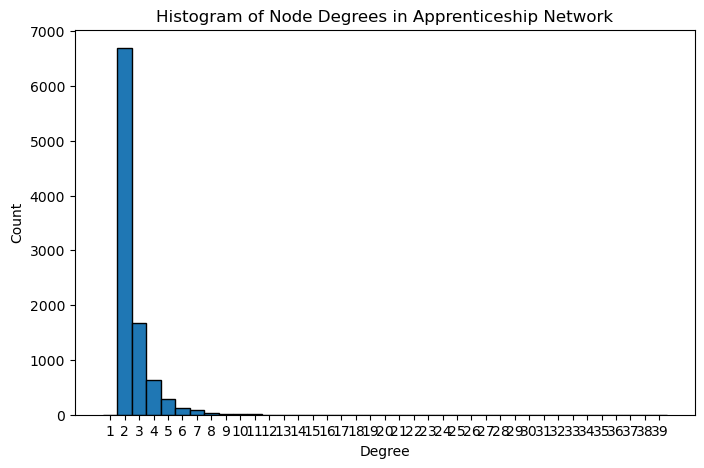

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(degrees_no_ones, bins=range(1, max(degrees_no_ones)+2), edgecolor='black', align='left')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Histogram of Node Degrees in Apprenticeship Network')
plt.xticks(range(1, max(degrees_no_ones)+1))
plt.show()

In [85]:
df_contracts_1722_1772 = df_contracts[
    (df_contracts['Date'] >= '1722-01-01') & (df_contracts['Date'] <= '1772-12-31')
]
print(len(df_contracts_1722_1772))
print(len(df_contracts))


4757
54216
